# Convolutional Neural Network Architecture

Download data.npy from the drive (https://drive.google.com/file/d/1mviuK-cY_hf_podpqy_YzJTfGyBh4BkV/view?usp=drive_link)

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/Users/gayathriselvaganapathi/miniconda3/envs/env_mask_detect/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint('model-017.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 482ms/step - accuracy: 0.5025 - loss: 0.6942 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 480ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 485ms/step - accuracy: 0.5281 - loss: 0.6931 - val_accuracy: 0.4919 - val_loss: 0.6932
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 493ms/step - accuracy: 0.4985 - loss: 0.6932 - val_accuracy: 0.4919 - val_loss: 0.6932
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 513ms/step - accuracy: 0.5312 - loss: 0.6929 - val_accuracy: 0.4919 - val_loss: 0.6933
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 517ms/step - accuracy: 0.4895 - loss: 0.6934 - val_accuracy: 0.4919 - val_loss: 0.6932
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 523ms/step - accuracy: 0.4983 - loss: 0.6932 - val_accuracy: 0.4919 - val_loss: 0.6932
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 532ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accu

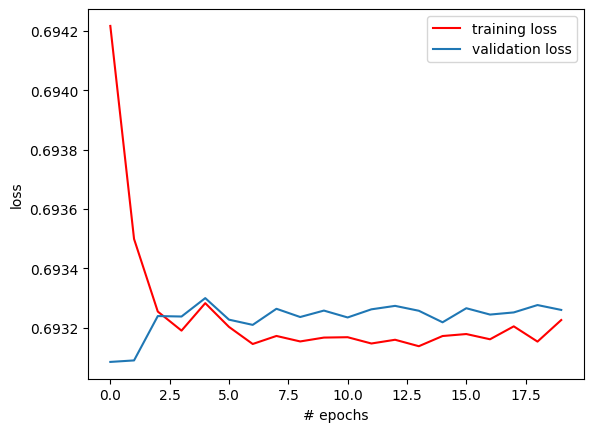

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

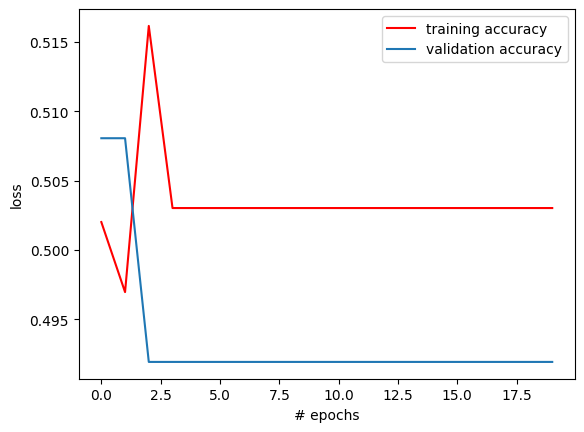

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(test_data,test_target))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.4803 - loss: 0.6934
[0.6930787563323975, 0.5072463750839233]
